# Start

In [1]:
1

1

In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
# import easyocr
#
# reader = easyocr.Reader(["es"])

In [5]:
import numpy as np

print(np.__version__)

1.22.3


In [6]:
import pdfplumber

print(pdfplumber.__version__)

0.5.28


In [7]:
import os

os.chdir("../")

In [8]:
root = os.getcwd()
pdf_file = os.path.join(root, "data/raw/Factura_FE22321385375221.pdf")

In [9]:
pdf = pdfplumber.open(pdf_file)

In [10]:
p1 = pdf.pages[1]

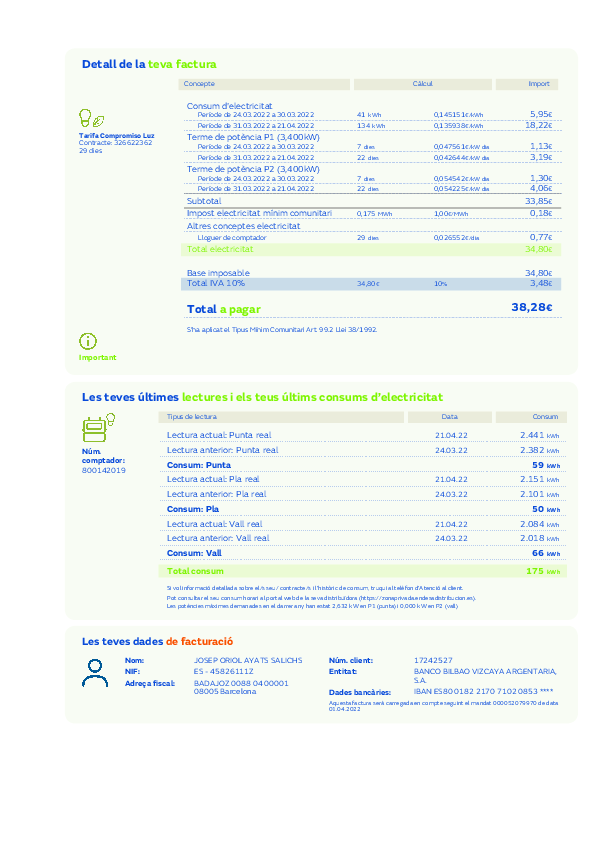

In [11]:
im = p1.to_image()
im

In [12]:
extracted_text = p1.extract_text()
pdf.close()
extracted_text

"Detalldelatevafactura\nConcepte Càlcul Import\nConsum d'electricitat\nPeríode de 24.03.2022 a 30.03.2022 41kWh 0,145151€/kWh 5,95€\n...........P...e..r..í.o...d...e.. ..d..e... .3...1......0..3......2...0...2...2... .a... .2...1.....0...4.....2...0...2...2..................................1...3...4.....k..W.....h.....................................0...,.1...3...5...9...3...8...€.../..k..W....h................................1....8....,.2....2....€.........\nTarifaCompromisoLuz ...T...e....r..m......e... .d....e.... .p....o...t...è...n....c...i..a... .P....1.... ..(..3....,.4....0....0....k...W.......)..............................................................................................................................................................................\nC29o ndtireascte: 326622362 Període de 24.03.2022 a 30.03.2022 7dies 0,047561€/kW dia 1,13€\n...........P...e..r..í.o...d...e.. ..d..e... .3...1......0..3......2...0...2...2... .a... .2...1.....0...4.....2...0...2.

In [13]:
# List of words of interest in order to find the desired section
power = {
    "potencia",
    "potència",
    "poténcia",
    "Potencia",
    "Potència",
    "Poténcia",
    "potencies",
    "potencias",
    "potències",
    "poténcias",
    "Potencias",
    "Potències",
    "Poténcias",
}
maxima = {
    "maxima",
    "màxima",
    "máxima",
    "Maxima",
    "Màxima",
    "Máxima",
    "maximes",
    "maximas",
    "màximes",
    "máximas",
    "Maximas",
    "Màximes",
    "Máximas",
}
year = {"any", "año", "Any", "Año"}
words = [power, maxima, year]

In [14]:
# Get the exact words
found = []
dummy = [
    found.append(word)
    for list_word in words
    for word in list_word
    if str(word) in extracted_text
]
found

['potències', 'màximes', 'any']

In [15]:
# Make the extracted text a list of str lines
extracted_text = extracted_text.splitlines()

In [16]:
# Extract the line where the words are located
for i, line in enumerate(extracted_text):
    if found[-1] in line:
        print(f"Target words found on line {i}:")
        target_line = extracted_text[i]
        print(target_line)

Target words found on line 46:
Lespotènciesmàximesdemanadeseneldarreranyhanestat2,632kWenP1(punta)i0,000kWenP2(vall)


In [17]:
import re

p1 = p2 = p3 = "Unknown"
line = target_line

if "P1" in line:
    p1 = line.split("P1")[0]
    numbers = re.findall(r"\d", p1)
    # numbers.split(numbers[0])

    line = line.split("P1")[-1]
if "P2" in line:
    p2 = line.split("P2")[0]
if "P3" in line:
    line = line.split("P2")[-1]
    p3 = line.split("P3")[0]


print(f"P1: {p1}")
print(f"P2: {p2}")
print(f"P3: {p3}")

P1: Lespotènciesmàximesdemanadeseneldarreranyhanestat2,632kWen
P2: (punta)i0,000kWen
P3: Unknown


In [18]:
import re

numbers = re.findall(r"\d", p1)
if "," in p1:
    p1 = p1.split(",")
    integers = re.findall(r"\d", p1[0])
    decimals = re.findall(r"\d", p1[-1])
    number = int(integers) + len(decimals) * 10 / int(decimals)
if "." in p1:
    p1 = p1.split(".")

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [ ]:
number

In [ ]:
int(integers)

In [ ]:
integers